In [1]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
import numpy as np

base_model = InceptionResNetV2(include_top=False, weights='imagenet')
# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(1, activation='sigmoid')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False
    
model.compile(optimizer='rmsprop', loss='binary_crossentropy')
model.summary()

Using TensorFlow backend.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'data/train',
        target_size=(299, 299),
        batch_size=20,
        classes=['dog', 'cat'],
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        'data/validation',
        target_size=(299, 299),
        batch_size=20,
        classes=['dog', 'cat'],
        class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [3]:

model.fit_generator(
        train_generator,
        steps_per_epoch=5000,
        epochs=15,
        validation_data=validation_generator,
        validation_steps=100)

Epoch 1/15
3566/5000 [====================>.........] - ETA: 7:15 - loss: 0.1403

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



5000/5000 [==============================] - 1539s 308ms/step - loss: 0.0862 - val_loss: 0.0772
Epoch 3/15
2227/5000 [============>.................] - ETA: 13:55 - loss: 0.0741

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



5000/5000 [==============================] - 1537s 307ms/step - loss: 0.0638 - val_loss: 0.1438
Epoch 5/15
 806/5000 [===>..........................] - ETA: 21:03 - loss: 0.0602

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4301/5000 [========================>.....] - ETA: 3:30 - loss: 0.0596

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



3175/5000 [==================>...........] - ETA: 9:09 - loss: 0.0569

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



5000/5000 [==============================] - 1538s 308ms/step - loss: 0.0575 - val_loss: 0.2133
Epoch 10/15
2005/5000 [===========>..................] - ETA: 15:02 - loss: 0.0563

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



5000/5000 [==============================] - 1537s 307ms/step - loss: 0.0551 - val_loss: 0.1635
Epoch 12/15
 362/5000 [=>............................] - ETA: 23:16 - loss: 0.0709

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4228/5000 [========================>.....] - ETA: 3:52 - loss: 0.0545

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



5000/5000 [==============================] - 1537s 307ms/step - loss: 0.0608 - val_loss: 0.1865
Epoch 15/15
2426/5000 [=============>................] - ETA: 12:55 - loss: 0.0470

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
model.save('Base_InceptionResNetV2_t10000_v2000_e15.h5')


In [5]:
test_generator = test_datagen.flow_from_directory(
    'data/test',
    target_size=(299, 299),
    batch_size=10,
    color_mode='rgb',
    classes=['dog', 'cat'],
    class_mode='binary')

Found 1400 images belonging to 2 classes.


In [7]:

results = model.evaluate_generator(
    test_generator,
    verbose=1,
    steps=140)

140/140 [==============================] - 25s 179ms/step


In [8]:
print('Final test accuracy:', (results))


Final test accuracy: 0.15556803623794854


data/train/dog/0//c76e9857b-1.jpg


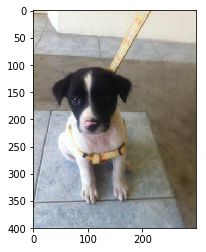

In [11]:
import random, os
from matplotlib import pyplot as plt
from PIL import Image

path = "data/train/dog/0/"
random_filename = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
])
print("data/train/dog/0/"+ os.sep + random_filename)
im=Image.open("data/train/dog/0/"+ os.sep + random_filename)
#im=Image.open('data/train/cat/0/e5728f078-1.jpg')
plt.imshow(im)
plt.show()

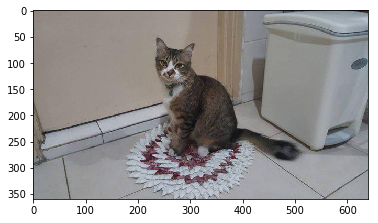

Predicted: [('n02747177', 'ashcan', 0.20809251), ('n02127052', 'lynx', 0.18331553), ('n02123045', 'tabby', 0.14549437)]


In [35]:
# predict one random image's prediction
path = "images"
random_filename = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
])

img_path = "images"+ os.sep + random_filename
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

im=Image.open("images"+ os.sep + random_filename)
plt.imshow(im)
plt.show()

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

In [ ]:
# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy')

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
model.fit_generator(...)